In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the dataset from Ho & Michalak (2017) containing objective function values and the corresponding design variables
data=pd.read_excel(r"C:\Users\gotta\OneDrive\Documents\Bureau\X\4A\US\Stanford\Classes\AA 222\Final Project\Data\Dataset.xlsx", engine='openpyxl') 
data=pd.DataFrame(data)
#Remove 
A=np.array(data[['WLE_area_avg']])
CI=np.array(data['WLE_CI_avg'])
X=data[['9year_cum','aprjul']]
X=np.array(X)

data_test=pd.read_excel(r"C:\Users\gotta\OneDrive\Documents\Bureau\X\4A\US\Stanford\Assistanships\Lake Erie Project\Code\Erb Proposal\Data\Dataset.xlsx", engine='openpyxl')
data_test=pd.DataFrame(data_test)
data_test=data_test[['year','comb_maxes','9year_cum','aprjul']]
data_test=data_test[data_test['year']<2000]
print(data_test)

    year  comb_maxes    9year_cum      aprjul
0   1984    762.8238  4595.125676  101.475220
1   1985    559.8477  4395.240746   16.716619
2   1986    756.5814  4165.521530   78.314889
3   1987    482.7564  3785.493180   67.033086
4   1988    536.1849  3393.870321   21.508606
5   1989    495.1548  2734.695836  101.007342
6   1990    371.7315  2311.821301  144.268660
7   1991    213.5600  2222.024371   79.987184
8   1992   1052.0325  2120.082268   95.293806
9   1993    159.5637  2233.983780  123.977553
10  1994    281.7450  2233.133811   10.890117
11  1995    308.6658  2124.247622   63.237927
12  1996    249.7059  2012.875204  140.987675
13  1997    381.0078  2287.590963  169.434633
14  1998    372.9528  2587.358762  135.147549
15  1999    483.3621  2620.009459   78.855003


In [8]:
def f_vector(X):
    # X shape: (n_samples, 2)
    cumulative_DRP = X[:, 0]
    springtime_DRP = X[:, 1]
    WLE_area_avg = (
        1.15932573e+00 * cumulative_DRP
        + 7.33376654e+00 * springtime_DRP
        - 9.71725717e-05 * cumulative_DRP**2
        - 5.27110541e-04 * cumulative_DRP * springtime_DRP
        - 5.19438894e-03 * springtime_DRP**2
        - 2742.27690937
    )
    WLE_CI_avg = (
        -7.66300341e-03 * cumulative_DRP
        + 4.43048133e-02 * springtime_DRP
        + 1.48037048e-06 * cumulative_DRP**2
        - 5.26642163e-07 * cumulative_DRP * springtime_DRP
        + 1.20878145e-05 * springtime_DRP**2
        + 4.560071263812404
    )
    WLE_area_avg = np.maximum(0, WLE_area_avg)
    WLE_CI_avg = np.maximum(0, WLE_CI_avg)
    return np.column_stack([WLE_area_avg, WLE_CI_avg])
def f_linear_vector(X):
    # X shape: (n_samples, 2)
    cumulative_DRP = X[:, 0]
    springtime_DRP = X[:, 1]
    WLE_area_avg = 0.31838624 * cumulative_DRP + 2.29792759 * springtime_DRP - 742.21898475
    WLE_CI_avg = 0.00348731 * cumulative_DRP + 0.04818059 * springtime_DRP - 15.344444752266575
    WLE_area_avg = np.clip(WLE_area_avg, 0, 1900)
    WLE_CI_avg = np.maximum(0, WLE_CI_avg)
    return np.column_stack([WLE_area_avg, WLE_CI_avg])

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RBFInterpolator

rbf_A = RBFInterpolator(X, A, kernel='gaussian',epsilon=0.0001232846739442066,smoothing= 1.519911082952933e-06)
rbf_CI = RBFInterpolator(X, CI, kernel='multiquadric',epsilon=6.579332246575683e-05,smoothing= 6.579332246575683e-05)
def f_rbf(X):
    # Calculate the objective function values
    WLE_area_avg = rbf_A(X)
    WLE_CI_avg = rbf_CI(X)
    WLE_area_avg = np.maximum(0, WLE_area_avg)  # Replace negatives with zero
    WLE_CI_avg = np.maximum(0, WLE_CI_avg) 
    return np.column_stack([WLE_area_avg, WLE_CI_avg])



In [9]:
data_test_2=data[['year','Area_Rick','CI_Rick','9year_cum','aprjul']]

In [10]:
from sklearn.metrics import r2_score, mean_squared_error
# area_linear_2=f_linear_vector(data_test_2[['9year_cum','aprjul']].values)
# area_rbf_2=f_rbf(data_test_2[['9year_cum','aprjul']].values)
# area_f_2=f_vector(data_test_2[['9year_cum','aprjul']].values)
# # Plotting the results for Rick's data
# plt.figure(figsize=(12, 6))
# plt.plot(data_test_2['year'], area_linear_2[:, 0], label='Linear Model Area', color='blue')
# plt.plot(data_test_2['year'], area_rbf_2[:, 0], label='RBF Model Area', color='orange')
# plt.plot(data_test_2['year'], area_f_2[:, 0], label='Polynomial Model Area', color='green')
# plt.plot(data_test_2['year'], data_test_2['Area_Rick'], label='Observed Area', color='red', linestyle='--')
# plt.xlabel('Year')
# plt.ylabel('WLE Area Average')
# plt.title('Comparison of WLE Area Averages for Rick\'s Data')
# plt.legend()
# plt.grid()
# plt.show()
# print("RMSE Linear Area Rick's Data:", np.sqrt(np.mean((area_linear_2[:, 0] - data_test_2['Area_Rick'])**2)))
# print("RMSE RBF Area Rick's Data:", np.sqrt(np.mean((area_rbf_2[:, 0] - data_test_2['Area_Rick'])**2)))
# print("RMSE Polynomial Area Rick's Data:", np.sqrt(np.mean((area_f_2[:, 0] - data_test_2['Area_Rick'])**2)))
# print("R² Linear Area Rick's Data:", r2_score(data_test_2['Area_Rick'], area_linear_2[:, 0]))
# print("R² RBF Area Rick's Data:", r2_score(data_test_2['Area_Rick'], area_rbf_2[:, 0]))
# print("R² Polynomial Area Rick's Data:", r2_score(data_test_2['Area_Rick'], area_f_2[:, 0]))
# plt.figure(figsize=(12, 6))
# plt.plot(data_test_2['year'], area_linear_2[:, 1], label='Linear Model CI', color='blue')
# plt.plot(data_test_2['year'], area_rbf_2[:, 1], label='RBF Model CI', color='orange')
# plt.plot(data_test_2['year'], area_f_2[:, 1], label='Polynomial Model CI', color='green')
# plt.plot(data_test_2['year'], data_test_2['CI_Rick'], label='Observed CI', color='red', linestyle='--')
# plt.xlabel('Year')
# plt.ylabel('WLE CI Average')
# plt.title('Comparison of WLE CI Averages for Rick\'s Data')
# plt.legend()
# plt.grid()
# plt.show()
# print("RMSE Linear CI Rick's Data:", np.sqrt(np.mean((area_linear_2[:, 1] - data_test_2['CI_Rick'])**2)))
# print("RMSE RBF CI Rick's Data:", np.sqrt(np.mean((area_rbf_2[:, 1] - data_test_2['CI_Rick'])**2)))
# print("RMSE Polynomial CI Rick's Data:", np.sqrt(np.mean((area_f_2[:, 1] - data_test_2['CI_Rick'])**2)))
# print("R² Linear CI Rick's Data:", r2_score(data_test_2['CI_Rick'], area_linear_2[:, 1]))
# print("R² RBF CI Rick's Data:", r2_score(data_test_2['CI_Rick'], area_rbf_2[:, 1]))
# print("R² Polynomial CI Rick's Data:", r2_score(data_test_2['CI_Rick'], area_f_2[:, 1]))


198.70777123358948 212.0332907234296 207.50857142003355
3.465323671664375 3.5326365680152736 3.5181516846434926
w_lin: [0.34545394 0.33716242], w_poly: [0.32374342 0.33073793], w_rbf: [0.33080264 0.33209964]


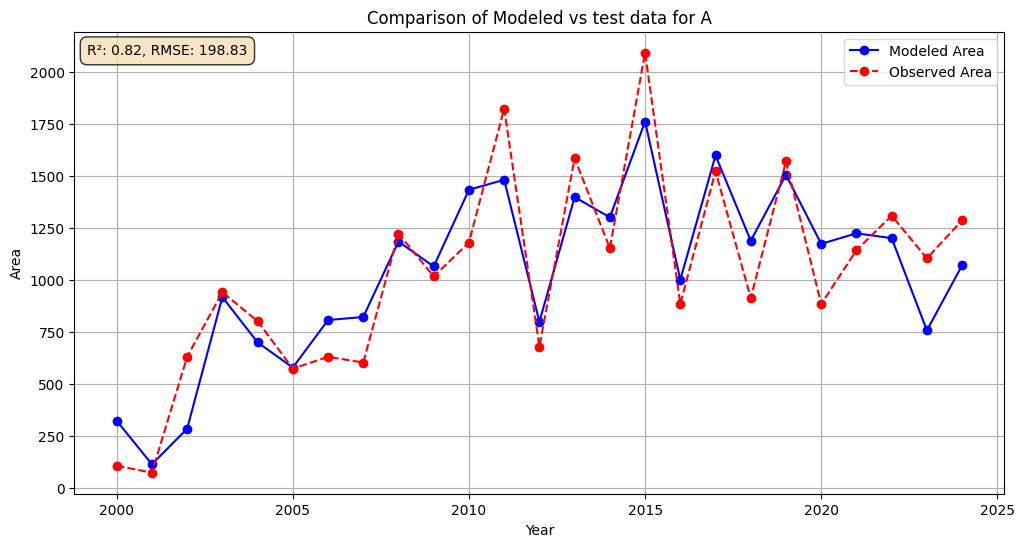

RMSE Made-up Area Rick's Data: 198.83300499520877
R² Made-up Area Rick's Data: 0.8214197636682232


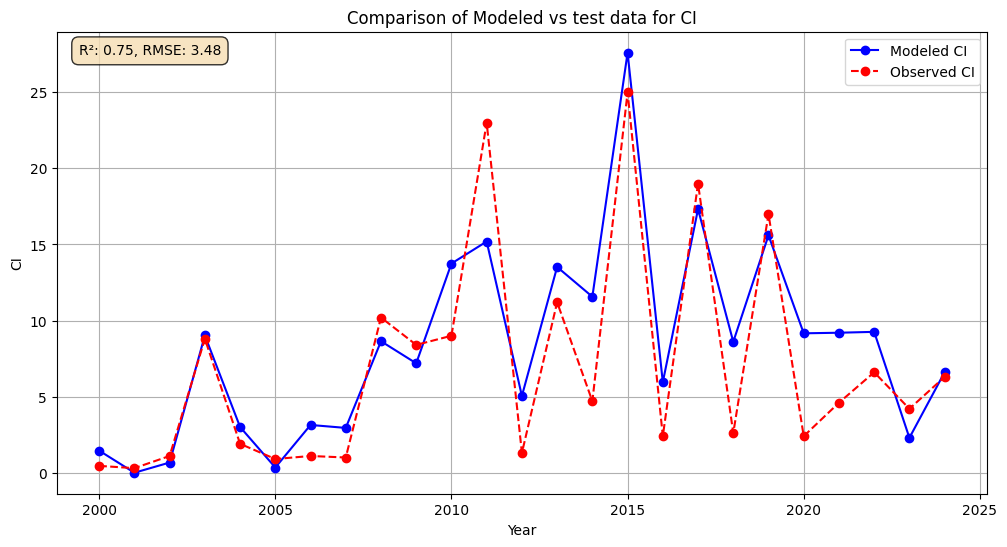

RMSE Made-up CI Rick's Data: 3.478537808386733
R² Made-up CI Rick's Data: 0.7543253908066948


In [11]:
# Calculate RMSE for each model
RMSE_lin_A = np.sqrt(np.mean((area_linear_2[:, 0] - data_test_2['Area_Rick'])**2))
RMSE_poly_A = np.sqrt(np.mean((area_f_2[:, 0] - data_test_2['Area_Rick'])**2))
RMSE_rbf_A = np.sqrt(np.mean((area_rbf_2[:, 0] - data_test_2['Area_Rick'])**2))
RMSE_lin_C = np.sqrt(np.mean((area_linear_2[:, 1] - data_test_2['CI_Rick'])**2))
RMSE_poly_C = np.sqrt(np.mean((area_f_2[:, 1] - data_test_2['CI_Rick'])**2))
RMSE_rbf_C = np.sqrt(np.mean((area_rbf_2[:, 1] - data_test_2['CI_Rick'])**2))
print(RMSE_lin_A, RMSE_poly_A, RMSE_rbf_A)
print(RMSE_lin_C, RMSE_poly_C, RMSE_rbf_C)
w_lin_A = (1/RMSE_lin_A)/(1/RMSE_lin_A + 1/RMSE_poly_A + 1/RMSE_rbf_A)
w_poly_A = (1/RMSE_poly_A)/(1/RMSE_lin_A + 1/RMSE_poly_A + 1/RMSE_rbf_A)
w_rbf_A = (1/RMSE_rbf_A)/(1/RMSE_lin_A + 1/RMSE_poly_A + 1/RMSE_rbf_A)
w_lin_C = (1/RMSE_lin_C)/(1/RMSE_lin_C + 1/RMSE_poly_C + 1/RMSE_rbf_C)
w_poly_C = (1/RMSE_poly_C)/(1/RMSE_lin_C + 1/RMSE_poly_C + 1/RMSE_rbf_C)
w_rbf_C = (1/RMSE_rbf_C)/(1/RMSE_lin_C + 1/RMSE_poly_C + 1/RMSE_rbf_C)

w_lin=np.array([w_lin_A,w_lin_C])
w_poly=np.array([w_poly_A,w_poly_C])
w_rbf=np.array([w_rbf_A,w_rbf_C])
print(f"w_lin: {w_lin}, w_poly: {w_poly}, w_rbf: {w_rbf}")
def f_vector(X):
    # X shape: (n_samples, 2)
    cumulative_DRP = X[:, 0]
    springtime_DRP = X[:, 1]
    WLE_area_avg = (
        1.15932573e+00 * cumulative_DRP
        + 7.33376654e+00 * springtime_DRP
        - 9.71725717e-05 * cumulative_DRP**2
        - 5.27110541e-04 * cumulative_DRP * springtime_DRP
        - 5.19438894e-03 * springtime_DRP**2
        - 2742.27690937
    )
    WLE_CI_avg = (
        -7.66300341e-03 * cumulative_DRP
        + 4.43048133e-02 * springtime_DRP
        + 1.48037048e-06 * cumulative_DRP**2
        - 5.26642163e-07 * cumulative_DRP * springtime_DRP
        + 1.20878145e-05 * springtime_DRP**2
        + 4.560071263812404
    )
    WLE_area_avg = np.maximum(0, WLE_area_avg)
    WLE_CI_avg = np.maximum(0, WLE_CI_avg)
    return np.column_stack([WLE_area_avg, WLE_CI_avg])
def f_linear_vector(X):
    # X shape: (n_samples, 2)
    cumulative_DRP = X[:, 0]
    springtime_DRP = X[:, 1]
    WLE_area_avg = 0.31838624 * cumulative_DRP + 2.29792759 * springtime_DRP - 742.21898475
    WLE_CI_avg = 0.00348731 * cumulative_DRP + 0.04818059 * springtime_DRP - 15.344444752266575
    WLE_area_avg = np.clip(WLE_area_avg, 0, 1900)
    WLE_CI_avg = np.maximum(0, WLE_CI_avg)
    return np.column_stack([WLE_area_avg, WLE_CI_avg])



# Compute predictions from each model
y_linear0 = f_linear_vector(X)  # shape (n_samples, 2)
y_poly0 = f_vector(X)           # shape (n_samples, 2)
y_rbf0 = f_rbf(X)               # shape (n_samples, 2)

# Stack into shape (n_samples, 2, 3): 3 models
y_all = np.stack([y_linear0, y_poly0, y_rbf0], axis=-1)  # shape (n_samples, 2, 3)

# Stack weights into shape (2, 3): 2 objectives, 3 models
weights = np.stack([w_lin, w_poly, w_rbf], axis=-1)   # shape (2, 3)

# Weighted sum across models for each objective
y_madeup = np.einsum('nij,ij->ni', y_all, weights)    # shape (n_samples, 2)
r2_A= r2_score(data_test_2['Area_Rick'], y_madeup[:, 0])
r2_C= r2_score(data_test_2['CI_Rick'], y_madeup[:, 1])
rmse_A= np.sqrt(mean_squared_error(data_test_2['Area_Rick'], y_madeup[:, 0]))
rmse_C= np.sqrt(mean_squared_error(data_test_2['CI_Rick'], y_madeup[:, 1]))
#plot the results vs the Rick dataset
plt.figure(figsize=(12, 6))
plt.plot(data_test_2['year'], y_madeup[:, 0], label='Modeled Area', color='blue',marker='o')
plt.plot(data_test_2['year'], data_test_2['Area_Rick'], label='Observed Area', color='red', linestyle='--',marker='o')
plt.xlabel('Year')
plt.ylabel('Area')
plt.title('Comparison of Modeled vs test data for A')
plt.legend()
# Replace the current text box with this improved version
plt.text(0.1, 0.95, f'R²: {r2_A:.2f}, RMSE: {rmse_A:.2f}', 
         horizontalalignment='center', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='wheat', alpha=0.8, boxstyle='round,pad=0.5'))
plt.grid()
plt.show()
print("RMSE Made-up Area Rick's Data:", np.sqrt(np.mean((y_madeup[:, 0] - data_test_2['Area_Rick'])**2)))
print("R² Made-up Area Rick's Data:", r2_score(data_test_2['Area_Rick'], y_madeup[:, 0]))
# Plotting the CI for the made-up model
plt.figure(figsize=(12, 6))
plt.plot(data_test_2['year'], y_madeup[:, 1], label='Modeled CI', color='blue',marker='o')
plt.plot(data_test_2['year'], data_test_2['CI_Rick'], label='Observed CI', color='red', linestyle='--',marker='o')
plt.xlabel('Year')
plt.ylabel('CI')
plt.title('Comparison of Modeled vs test data for CI')
plt.text(0.1, 0.95, f'R²: {r2_C:.2f}, RMSE: {rmse_C:.2f}', 
         horizontalalignment='center', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='wheat', alpha=0.8, boxstyle='round,pad=0.5'))
plt.legend()
plt.grid()
plt.show()
print("RMSE Made-up CI Rick's Data:", np.sqrt(np.mean((y_madeup[:, 1] - data_test_2['CI_Rick'])**2)))
print("R² Made-up CI Rick's Data:", r2_score(data_test_2['CI_Rick'], y_madeup[:, 1]))

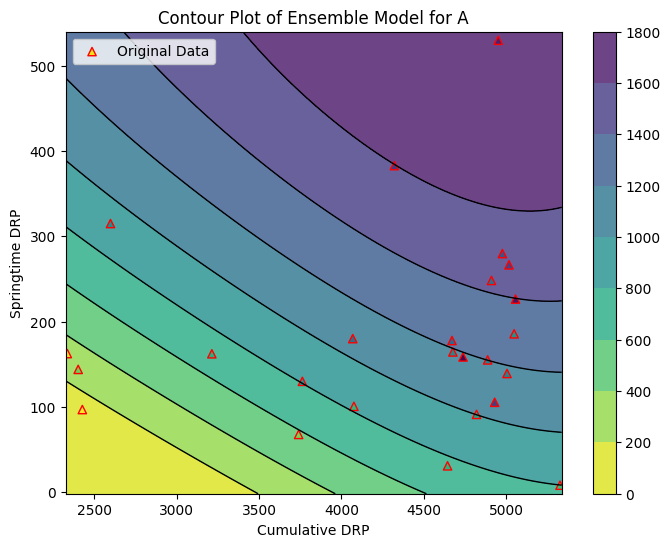

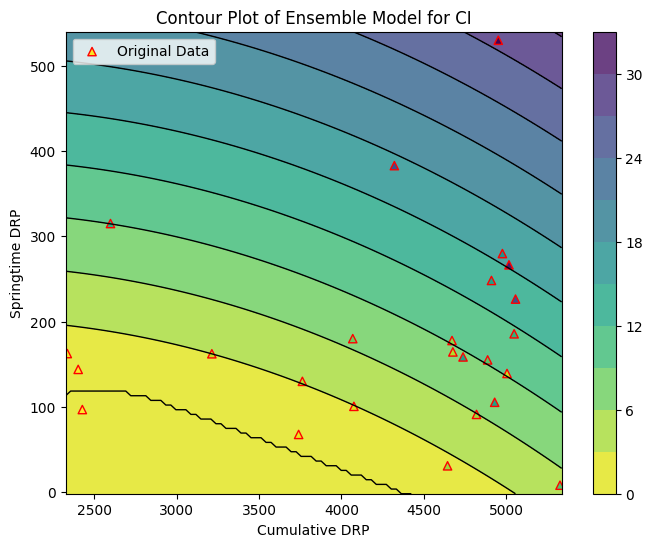

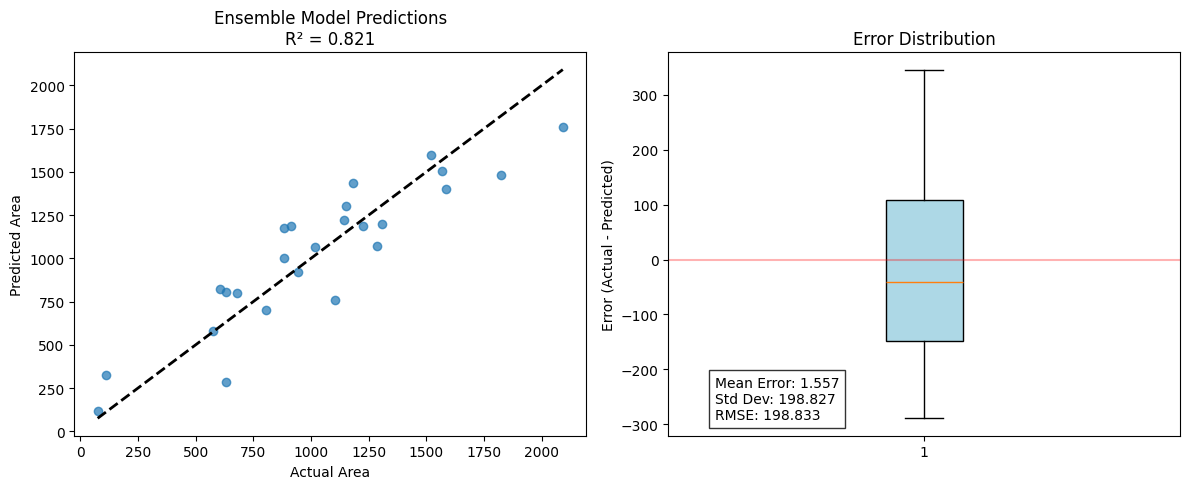

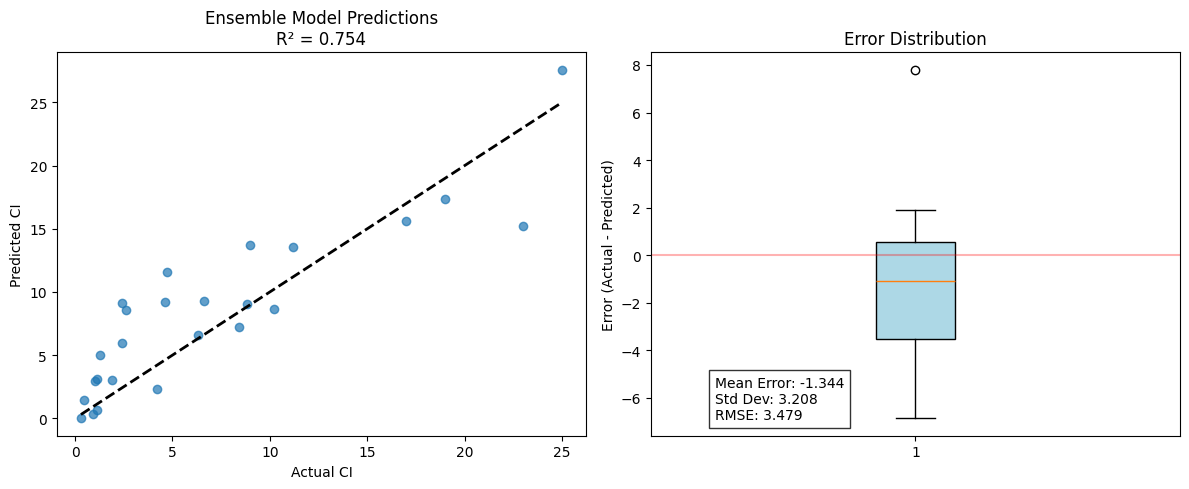

In [12]:
from sklearn.metrics import r2_score, mean_squared_error
# Create a dense grid for the contour plot
x1_range = np.linspace(min(X[:, 0])-10, max(X[:, 0])+10, 100)
x2_range = np.linspace(min(X[:, 1])-10, max(X[:, 1])+10, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
X_grid = np.column_stack((X1.ravel(), X2.ravel()))

# Compute predictions from each model for the grid points
y_linear_grid = f_linear_vector(X_grid)
y_poly_grid = f_vector(X_grid)
y_rbf_grid = f_rbf(X_grid)

# Stack into shape (n_grid_points, 2, 3): 3 models
y_all_grid = np.stack([y_linear_grid, y_poly_grid, y_rbf_grid], axis=-1)

# Weighted sum across models for each objective (same weights as before)
y_madeup_grid = np.einsum('nij,ij->ni', y_all_grid, weights)

# Plot contour plots for both objectives
for i, obj_name in enumerate(['A', 'CI']):
    # Reshape for contour plot
    z_grid = y_madeup_grid[:, i].reshape(X1.shape)
    
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(X1, X2, z_grid, 10, cmap='viridis_r', alpha=0.8)
    plt.colorbar(contour)
    plt.contour(X1, X2, z_grid, 10, colors='black', linewidths=1)
    
    # Scatter the original data points
    z_values = A if i == 0 else CI
    plt.scatter(X[:, 0], X[:, 1], c=z_values, cmap='viridis_r', 
                marker='^', edgecolors='red', label='Original Data', alpha=1)
    
    plt.title(f"Contour Plot of Ensemble Model for {obj_name}")
    plt.xlabel("Cumulative DRP")
    plt.ylabel("Springtime DRP")
    plt.legend()
    plt.show()


# Create error plots for both objectives
for i, (obj_name, true_values) in enumerate(zip(['Area', 'CI'], [np.array(data_test_2[['Area_Rick']]),
 np.array(data_test_2[['CI_Rick']])])):


    pred_values = y_madeup[:, i]
    true_values = np.array(true_values).flatten()  # Ensure true_values is 1D
    pred_values = np.array(pred_values).flatten()  # Ensure pred_values is 1D

        
    # Now the errors will be 1D and produce a single box
    errors = true_values - pred_values
    r2 = r2_score(true_values, pred_values)
    
    plt.figure(figsize=(12, 5))
    
    # First subplot: Predictions vs Actual values
    plt.subplot(1, 2, 1)
    plt.scatter(true_values, pred_values, alpha=0.7)
    plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], 'k--', lw=2)
    plt.xlabel(f'Actual {obj_name}')
    plt.ylabel(f'Predicted {obj_name}')
    plt.title(f'Ensemble Model Predictions\nR² = {r2:.3f}')
    
    # Second subplot: Box plot of errors
    plt.subplot(1, 2, 2)
    plt.boxplot(errors, vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
    plt.ylabel('Error (Actual - Predicted)')
    plt.title('Error Distribution')
    
    # Add text with error statistics
    error_mean = np.mean(errors)
    error_std = np.std(errors)
    rmse = np.sqrt(mean_squared_error(true_values, pred_values))
    plt.figtext(0.60, 0.15, 
                f'Mean Error: {error_mean:.3f}\nStd Dev: {error_std:.3f}\nRMSE: {rmse:.3f}', 
                bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()